Using the titanic data, in your classification-exercises repository, create a notebook, decision_tree.ipynb where you will do the following:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import acquire as acq
import prepare as prep

In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [13]:
# Get the data

titanic = acq.get_titanic_data()

In [14]:
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [15]:
# Prep the data

titanic = prep.prep_titanic(titanic)

In [16]:
titanic.head()

,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
passenger_id,,,,,,,,,,,
0,0,3,male,1,0,7.2500,S,0,1,0,1
1,1,1,female,1,0,71.2833,C,0,0,0,0
2,1,3,female,0,0,7.9250,S,1,0,0,1
3,1,1,female,1,0,53.1000,S,0,0,0,1
4,0,3,male,0,0,8.0500,S,1,1,0,1


In [17]:
train_titanic, validate_titanic, test_titanic = prep.split_data(titanic, 'survived')

In [18]:
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 455 to 496
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    534 non-null    int64  
 1   pclass      534 non-null    int64  
 2   sex         534 non-null    object 
 3   sibsp       534 non-null    int64  
 4   parch       534 non-null    int64  
 5   fare        534 non-null    float64
 6   embarked    533 non-null    object 
 7   alone       534 non-null    int64  
 8   sex_male    534 non-null    uint8  
 9   embarked_Q  534 non-null    uint8  
 10  embarked_S  534 non-null    uint8  
dtypes: float64(1), int64(5), object(2), uint8(3)
memory usage: 39.1+ KB


PCLASS



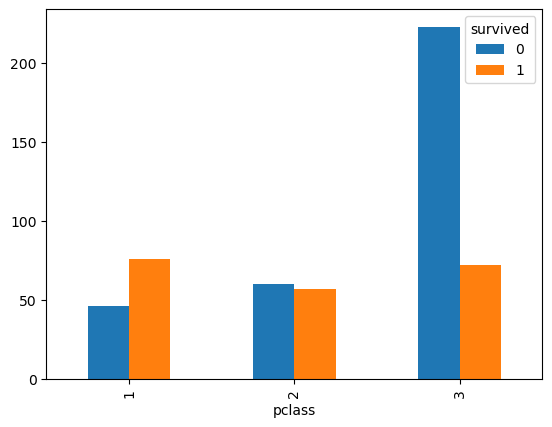

1.4382038993307037e-13
Expected
            0           1
0   75.164794   46.835206
1   72.084270   44.915730
2  181.750936  113.249064

Observed

survived    0   1
pclass           
1          46  76
2          60  57
3         223  72


SEX



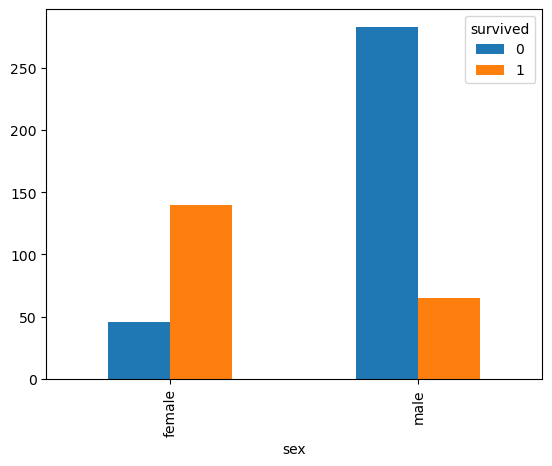

4.713975848915998e-37
Expected
            0           1
0  114.595506   71.404494
1  214.404494  133.595506

Observed

survived    0    1
sex               
female     46  140
male      283   65


SIBSP



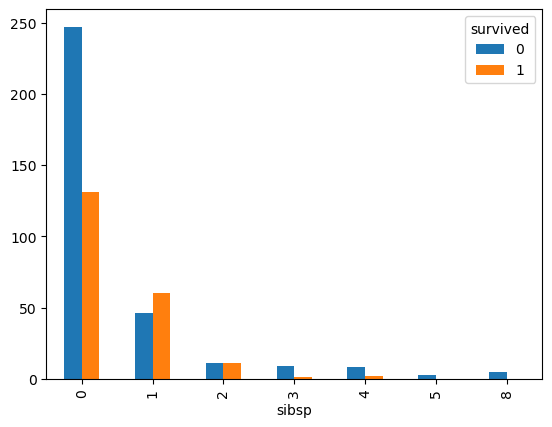

8.720655901386001e-05
Expected
            0           1
0  232.887640  145.112360
1   65.307116   40.692884
2   13.554307    8.445693
3    6.161049    3.838951
4    6.161049    3.838951
5    1.848315    1.151685
6    3.080524    1.919476

Observed

survived    0    1
sibsp             
0         247  131
1          46   60
2          11   11
3           9    1
4           8    2
5           3    0
8           5    0


PARCH



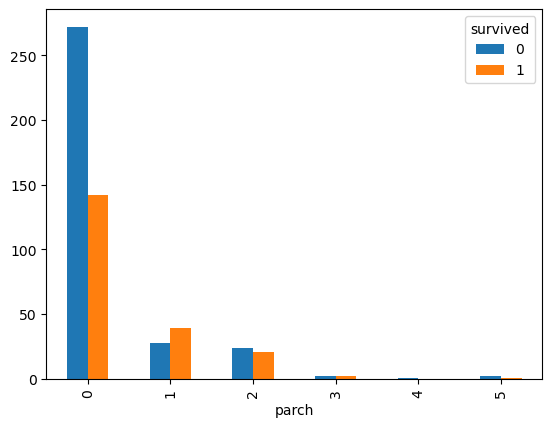

0.0061851290275685405
Expected
            0           1
0  255.067416  158.932584
1   41.279026   25.720974
2   27.724719   17.275281
3    2.464419    1.535581
4    0.616105    0.383895
5    1.848315    1.151685

Observed

survived    0    1
parch             
0         272  142
1          28   39
2          24   21
3           2    2
4           1    0
5           2    1


EMBARKED



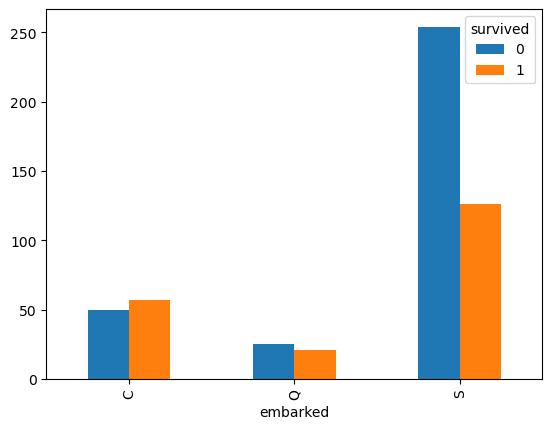

0.00044021947740971137
Expected
            0           1
0   66.046904   40.953096
1   28.393996   17.606004
2  234.559099  145.440901

Observed

survived    0    1
embarked          
C          50   57
Q          25   21
S         254  126


ALONE



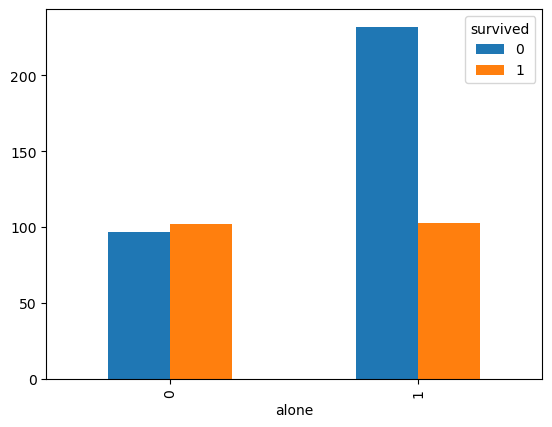

3.8366042996023025e-06
Expected
            0           1
0  122.604869   76.395131
1  206.395131  128.604869

Observed

survived    0    1
alone             
0          97  102
1         232  103




In [19]:
# Explore a bit, see which features we'd want to send in. This round, we're looking at categorical variables.

for col in train_titanic.iloc[:,1:-3]:
    if train_titanic[col].dtype != 'float64':
        print(col.upper())
        print()
        pct = pd.crosstab(train_titanic[col], train_titanic.survived)
        pct.plot.bar()
        plt.show()
        res, p, dgf, exp = stats.chi2_contingency(pd.crosstab(train_titanic[col], train_titanic.survived))
        print(p)
        print('Expected')
        print(pd.DataFrame(exp))
        print()
        print('Observed')
        print()
        print(pd.crosstab(train_titanic[col], train_titanic.survived))
        print()
        print()

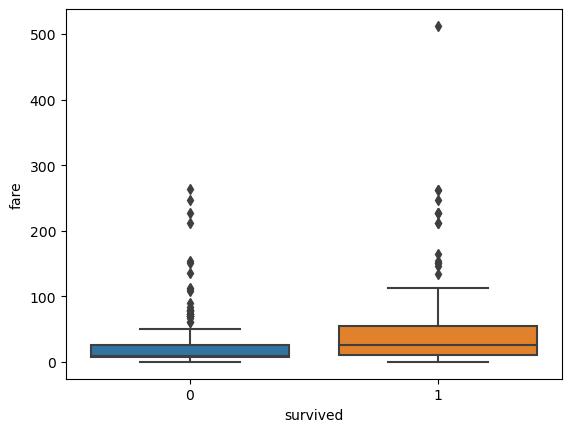

MannwhitneyuResult(statistic=57806.5, pvalue=4.553477179250237e-22)

In [21]:
# This round, we're looking at the one continuous variable, fare.

sns.boxplot(data=train_titanic, x=train_titanic.survived, y=train_titanic.fare) # not norm distribution, using Mann-Whitney
plt.show()

stats.mannwhitneyu(titanic.fare[titanic.survived == 0], titanic.fare[titanic.survived == 1])

In [11]:
# Round up variables with lowest p-values

# sex (p = e-37)
# pclass (p = e-13)
# fare (p = e-22)

# even though alone had p = e-06, we'll save that for later in potential future rounds

- What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [12]:
train_titanic.survived.value_counts() # Our baseline is surived = 0, with a count of 329

0    329
1    205
Name: survived, dtype: int64

In [13]:
329 / (329+205) # Our baseline accuracy is 61.61%

0.6161048689138576

- Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [15]:
# We'll try first with all features

clf = DecisionTreeClassifier()
X_train = train_titanic.iloc[:,1:].select_dtypes(exclude='object')
y_train = train_titanic.survived
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
clf.score(X_train, y_train)

0.9456928838951311

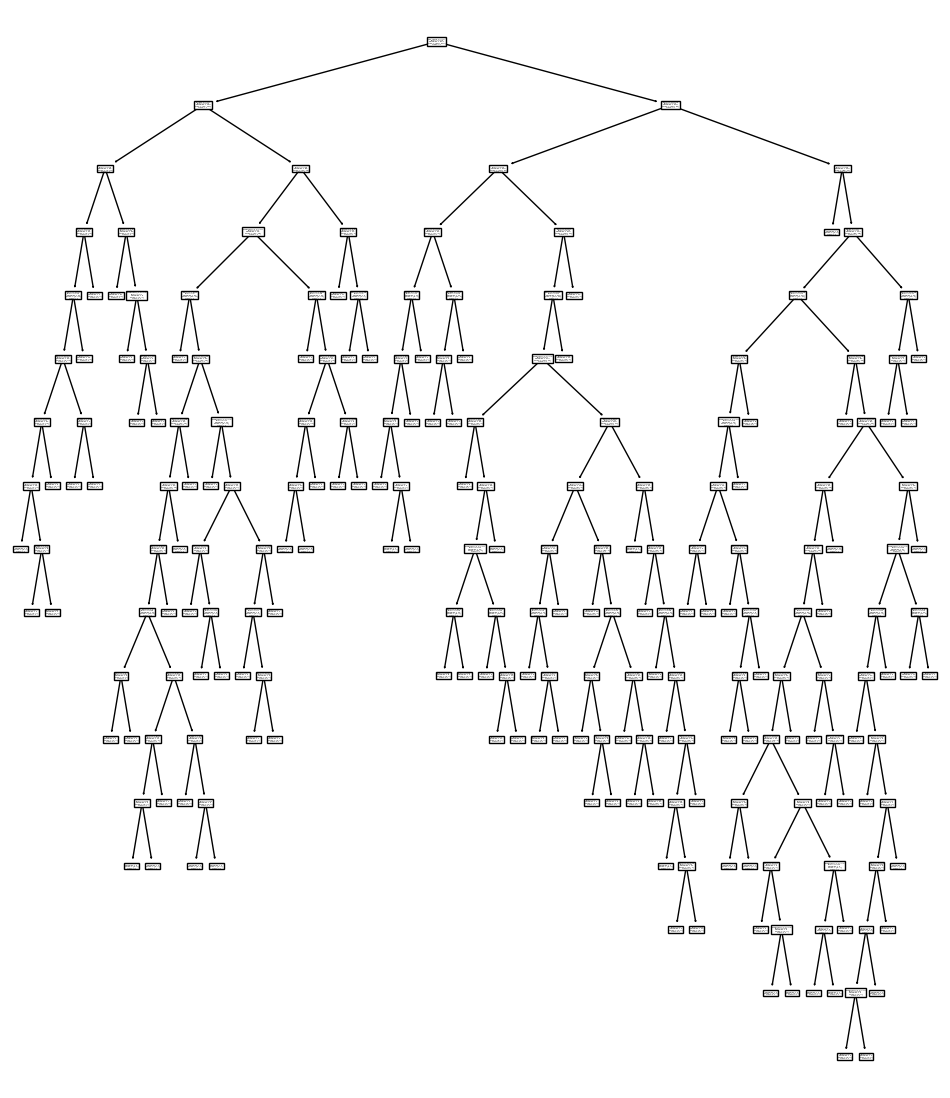

In [17]:
plt.figure(figsize=(12,14))
plot_tree(clf, 
          feature_names=X_train.columns, 
          class_names=clf.classes_.astype(str)
         )
plt.show() # Whoa that's a lot of decisions... high chances that this is overfitting... let's validate!

In [18]:
X_validate = validate_titanic.iloc[:,1:].select_dtypes(exclude='object')
y_validate = validate_titanic.survived
clf.score(X_validate, y_validate) # Dropped down to 74% from 95%. Overfit...

0.7303370786516854

In [19]:
# This time, I want to only send in features I think are most important.

features = ['sex_male', 'pclass', 'fare']
clf.fit(X_train[features], y_train)
clf.score(X_train[features], y_train) # Not as good as sending in all features

0.9269662921348315

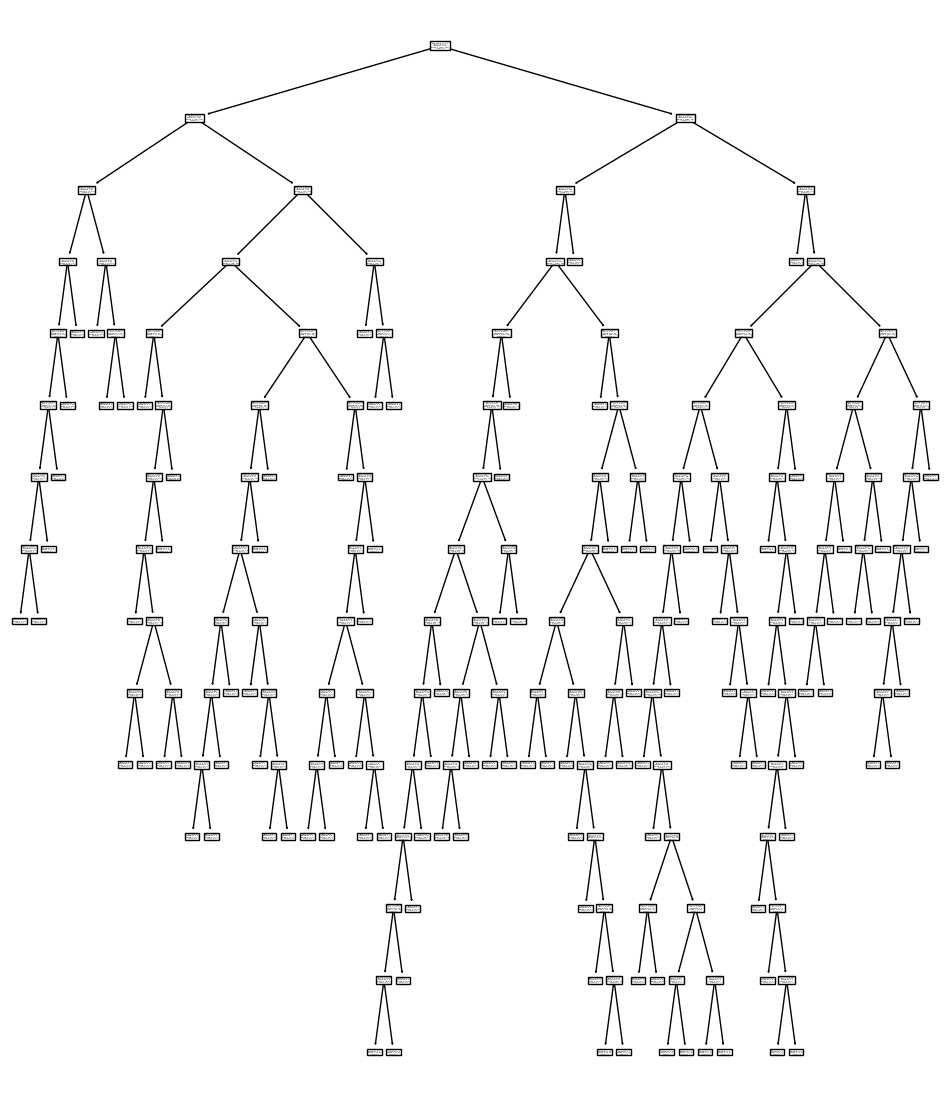

In [20]:
plt.figure(figsize=(12,14))
tree = plot_tree(clf,
         feature_names = X_train[features].columns,
         class_names = clf.classes_.astype(str)
         )
plt.show()

In [21]:
# Let's validate with the selected features

clf.score(X_validate[features], y_validate) # 78% down from 92%... might need to tweak hyperparameters

0.7865168539325843

In [22]:
clf = DecisionTreeClassifier(max_depth=3) # Adjusting depth to 3
clf.fit(X_train[features], y_train)
clf.score(X_train[features], y_train)

0.8183520599250936

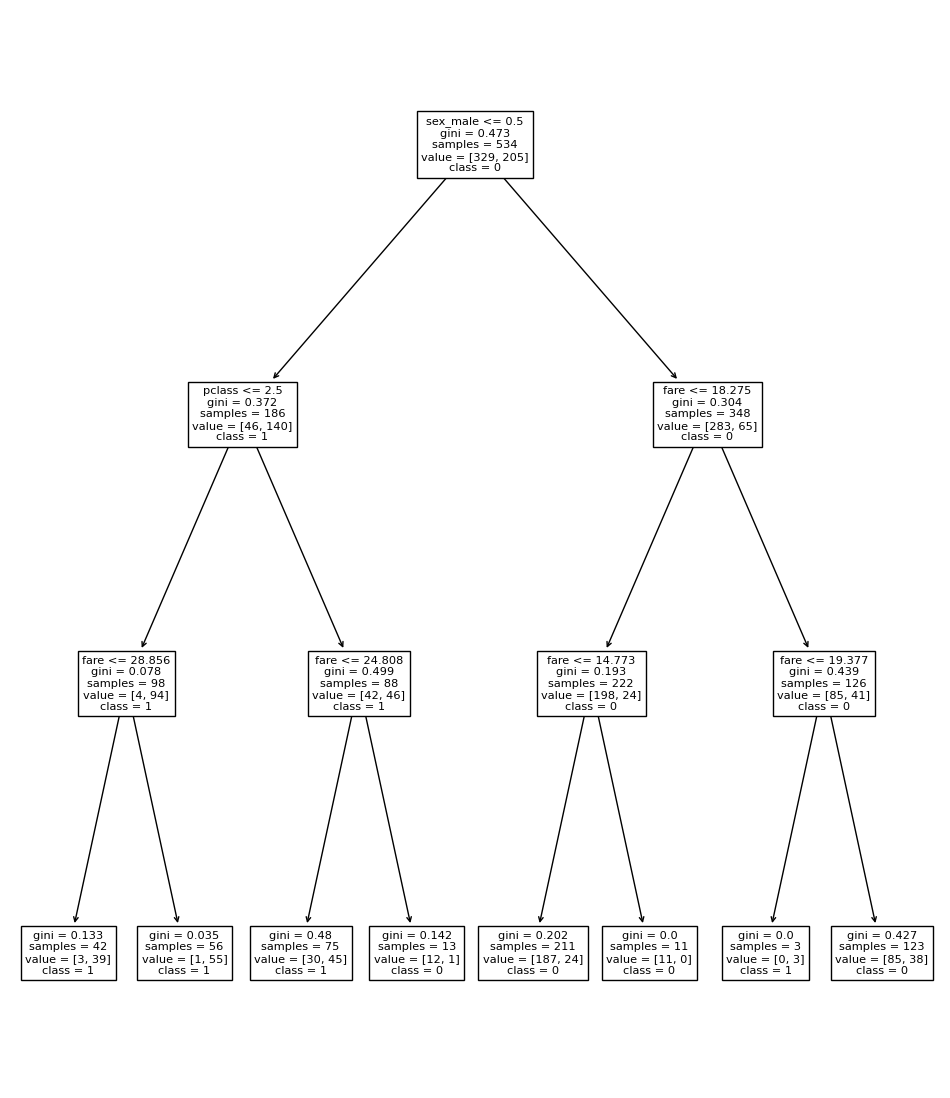

In [23]:
plt.figure(figsize=(12,14))
tree = plot_tree(clf,
         feature_names = X_train[features].columns,
         class_names = clf.classes_.astype(str)
         )
plt.show()

In [24]:
clf.score(X_validate[features], y_validate) # 79% down from 82%. No overfitting. We'll go with this one. 

0.7921348314606742

In [25]:
# Note to self, my model contains [features] and max_depth = 4.

- Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [26]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train[features], y_train)
tree.score(X_train[features], y_train)

0.8202247191011236

In [27]:
y_pred = tree.predict(X_train[features]) # y_pred to feed into confusion matrix

In [28]:
confusion_matrix(y_train, y_pred)

array([[296,  33],
       [ 63, 142]])

In [29]:
pd.DataFrame(confusion_matrix(y_train, y_pred),
            index = ['survived_actual', 'not_survived'],
            columns = ['survived_predict', 'not_survived_predict'])

,survived_predict,not_survived_predict
survived_actual,296,33
not_survived,63,142


- Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [30]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       329
           1       0.81      0.69      0.75       205

    accuracy                           0.82       534
   macro avg       0.82      0.80      0.80       534
weighted avg       0.82      0.82      0.82       534



- Run through steps 2-4 using a different max_depth value.

In [31]:
# Oh... I already did all these already.

- Which model performs better on your in-sample data?

In [32]:
# This as well. My model with max_depth = 4 and [features]

- Which model performs best on your out-of-sample data, the validate set?

In [23]:
for x in range(1,20):
    tree = DecisionTreeClassifier(max_depth=x)
    tree.fit(X_train, y_train)
    train_acc = tree.score(X_train, y_train)
    print(f'for depth of {x}, the accuracy is {train_acc}')
    val_acc = tree.score(X_validate, y_validate)
    print(f'for depth of {x}, the val_acc is {val_acc}')

NameError: name 'X_train' is not defined

Work through these same exercises using the Telco dataset.

In [3]:
# Get data

telco = acq.get_telco_data()

In [4]:
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [5]:
# Prep data

telco = prep.prep_telco(telco)

In [6]:
telco.head().T

customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,1,0,0,1,1
dependents,1,0,0,0,0
tenure,9,9,4,13,3
phone_service,1,1,1,1,1
multiple_lines,0,1,0,0,0
online_security,0,0,0,0,0
online_backup,1,0,0,1,0
device_protection,0,0,1,1,0


In [7]:
train_telco, validate_telco, test_telco = prep.split_data(telco, 'churn')

In [8]:
train_telco.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_tv_No internet service,streaming_movies_1,streaming_movies_No internet service,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
customer_id,,,,,,,,,,,,,,,,,,,,,
8319-QBEHW,Male,0,0,1,26,0,No phone service,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3547-LQRIK,Female,0,1,0,47,1,1,No internet service,No internet service,No internet service,...,1,0,1,1,0,0,1,0,1,0
8280-MQRQN,Female,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
8626-PTQGE,Male,0,0,0,69,0,No phone service,1,1,0,...,0,1,0,0,1,0,0,0,0,0
1142-IHLOO,Female,0,0,0,51,1,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0


GENDER



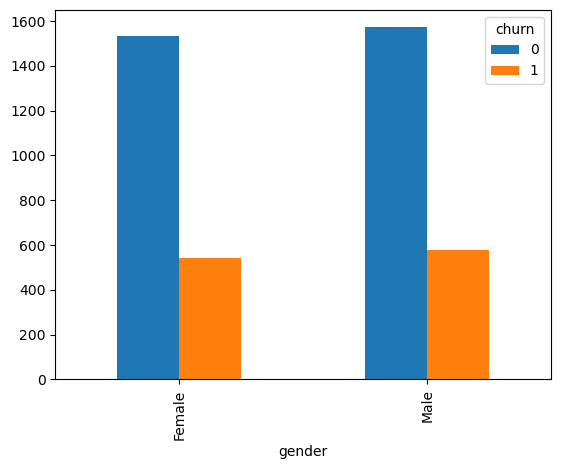

P-value is: 0.6101126964282866

Expected
             0           1
0  1525.184379  550.815621
1  1578.815621  570.184379

Observed

churn      0    1
gender           
Female  1533  543
Male    1571  578


SENIOR_CITIZEN



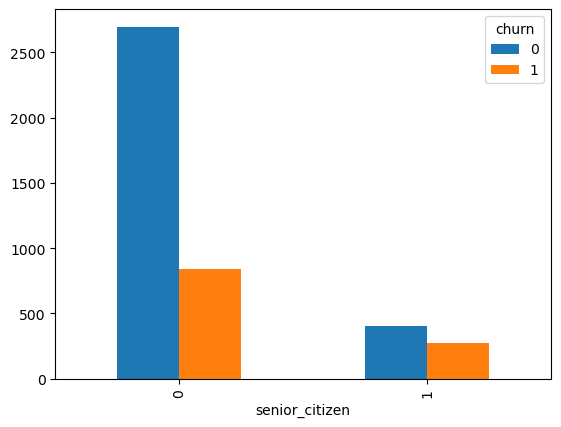

P-value is: 2.505662983276272e-19

Expected
             0           1
0  2601.482604  939.517396
1   502.517396  181.482604

Observed

churn              0    1
senior_citizen           
0               2697  844
1                407  277


PARTNER



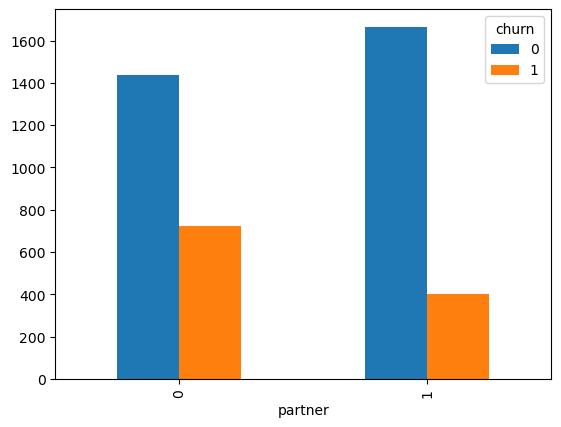

P-value is: 5.362120825511991e-25

Expected
             0           1
0  1587.631716  573.368284
1  1516.368284  547.631716

Observed

churn       0    1
partner           
0        1439  722
1        1665  399


DEPENDENTS



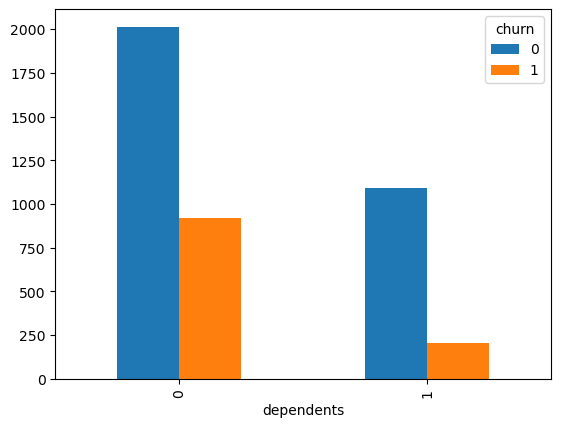

P-value is: 4.0728740930257814e-26

Expected
             0           1
0  2153.331124  777.668876
1   950.668876  343.331124

Observed

churn          0    1
dependents           
0           2013  918
1           1091  203


TENURE



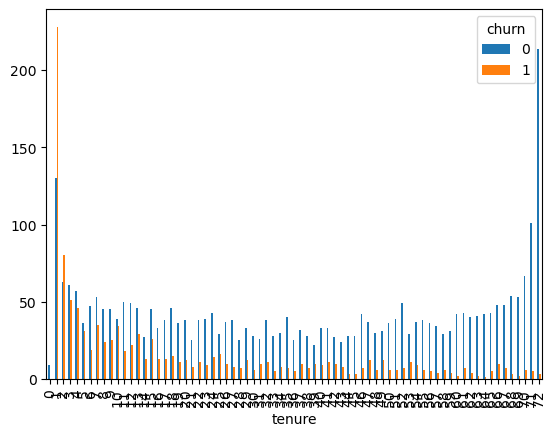

P-value is: 1.3020207852716985e-98

Expected
             0          1
0     6.612071   2.387929
1   263.013491  94.986509
2   105.058462  37.941538
3    82.283550  29.716450
4    75.671479  27.328521
..         ...        ...
68   41.876450  15.123550
69   40.407101  14.592899
70   53.631243  19.368757
71   77.875503  28.124497
72  159.424379  57.575621

[73 rows x 2 columns]

Observed

churn     0    1
tenure          
0         9    0
1       130  228
2        63   80
3        61   51
4        57   46
...     ...  ...
68       54    3
69       53    2
70       67    6
71      101    5
72      214    3

[73 rows x 2 columns]


PHONE_SERVICE



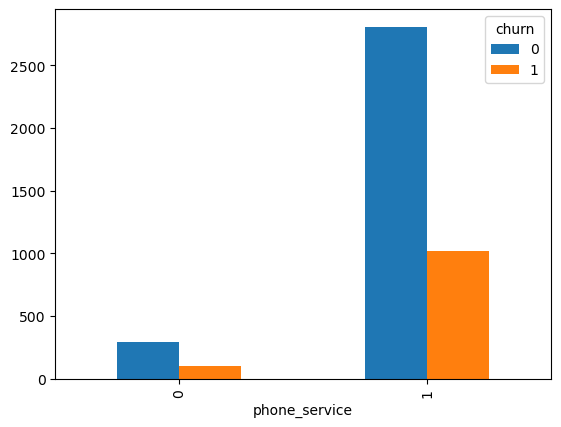

P-value is: 0.48858174831711587

Expected
             0            1
0   288.727101   104.272899
1  2815.272899  1016.727101

Observed

churn             0     1
phone_service            
0               295    98
1              2809  1023


MULTIPLE_LINES



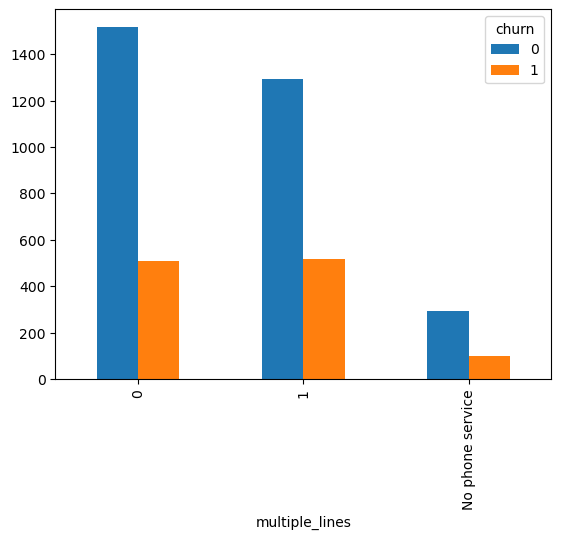

P-value is: 0.0433798300592795

Expected
             0           1
0  1487.715976  537.284024
1  1327.556923  479.443077
2   288.727101  104.272899

Observed

churn                0    1
multiple_lines             
0                 1517  508
1                 1292  515
No phone service   295   98


ONLINE_SECURITY



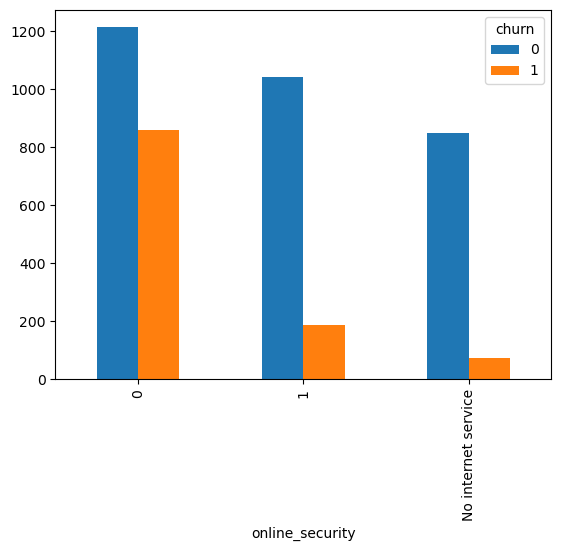

P-value is: 1.7863818020718678e-104

Expected
             0           1
0  1520.776331  549.223669
1   905.119053  326.880947
2   678.104615  244.895385

Observed

churn                   0    1
online_security               
0                    1212  858
1                    1043  189
No internet service   849   74


ONLINE_BACKUP



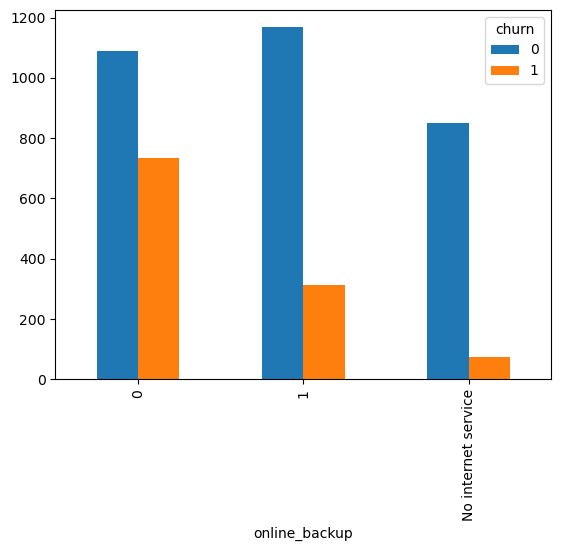

P-value is: 1.9357433073779636e-79

Expected
             0           1
0  1339.311716  483.688284
1  1086.583669  392.416331
2   678.104615  244.895385

Observed

churn                   0    1
online_backup                 
0                    1088  735
1                    1167  312
No internet service   849   74


DEVICE_PROTECTION



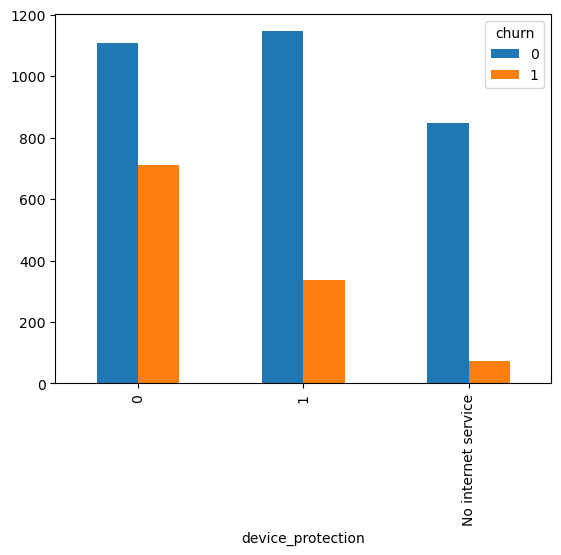

P-value is: 4.9488394966464925e-70

Expected
             0           1
0  1336.373018  482.626982
1  1089.522367  393.477633
2   678.104615  244.895385

Observed

churn                   0    1
device_protection             
0                    1109  710
1                    1146  337
No internet service   849   74


TECH_SUPPORT



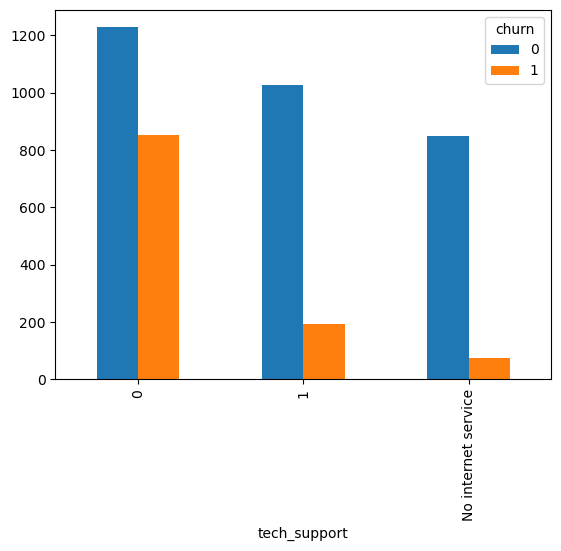

P-value is: 1.3436559397518597e-99

Expected
             0           1
0  1527.388402  551.611598
1   898.506982  324.493018
2   678.104615  244.895385

Observed

churn                   0    1
tech_support                  
0                    1227  852
1                    1028  195
No internet service   849   74


STREAMING_TV



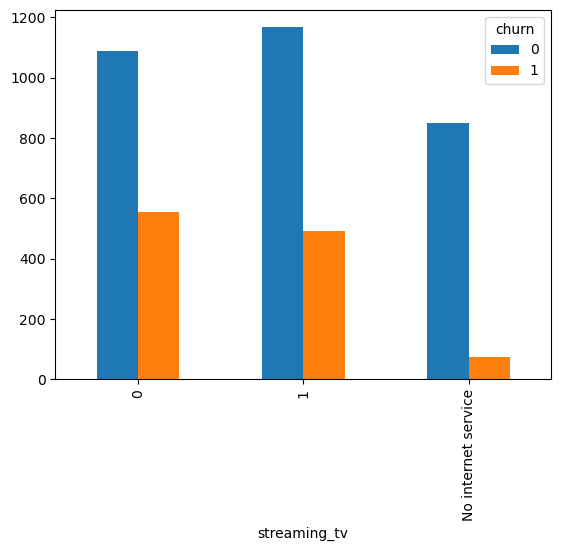

P-value is: 2.002361388542972e-47

Expected
             0           1
0  1208.539645  436.460355
1  1217.355740  439.644260
2   678.104615  244.895385

Observed

churn                   0    1
streaming_tv                  
0                    1089  556
1                    1166  491
No internet service   849   74


STREAMING_MOVIES



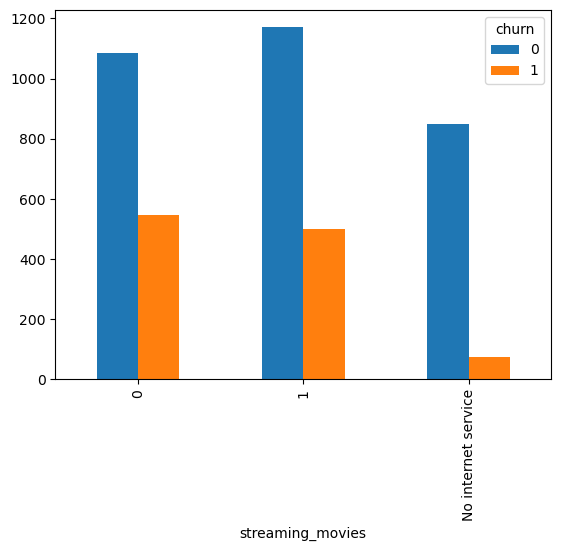

P-value is: 5.97031386230966e-47

Expected
             0           1
0  1198.254201  432.745799
1  1227.641183  443.358817
2   678.104615  244.895385

Observed

churn                   0    1
streaming_movies              
0                    1085  546
1                    1170  501
No internet service   849   74


CHURN



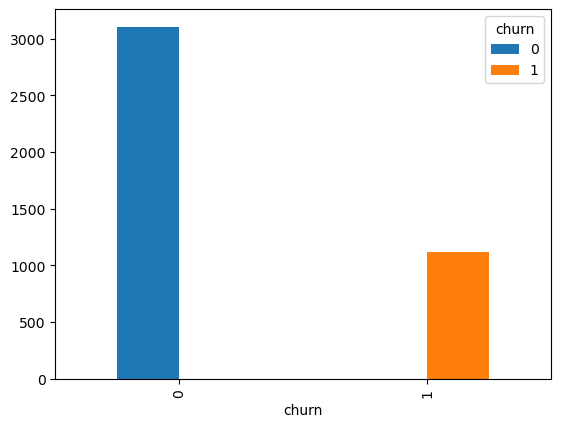

P-value is: 0.0

Expected
             0           1
0  2280.429822  823.570178
1   823.570178  297.429822

Observed

churn     0     1
churn            
0      3104     0
1         0  1121


CONTRACT_TYPE



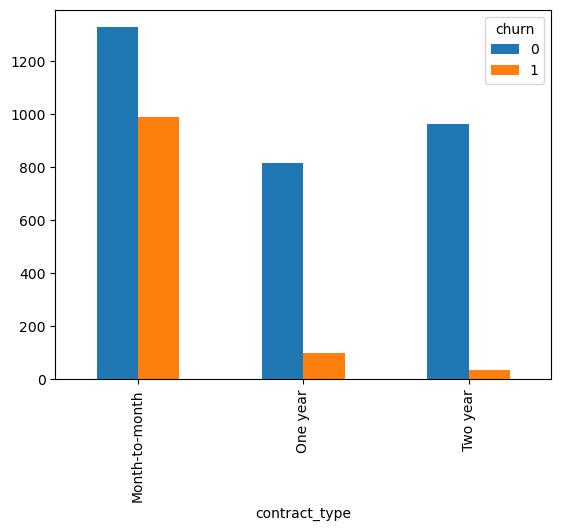

P-value is: 1.4947896745220748e-153

Expected
             0           1
0  1702.240947  614.759053
1   670.757870  242.242130
2   731.001183  263.998817

Observed

churn              0    1
contract_type            
Month-to-month  1327  990
One year         815   98
Two year         962   33


INTERNET_SERVICE_TYPE



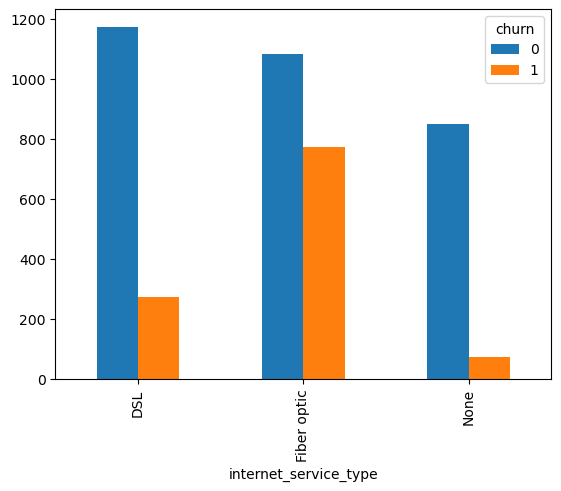

P-value is: 1.2316358365835844e-92

Expected
             0           1
0  1063.074083  383.925917
1  1362.821302  492.178698
2   678.104615  244.895385

Observed

churn                     0    1
internet_service_type           
DSL                    1173  274
Fiber optic            1082  773
None                    849   74


PAYMENT_TYPE



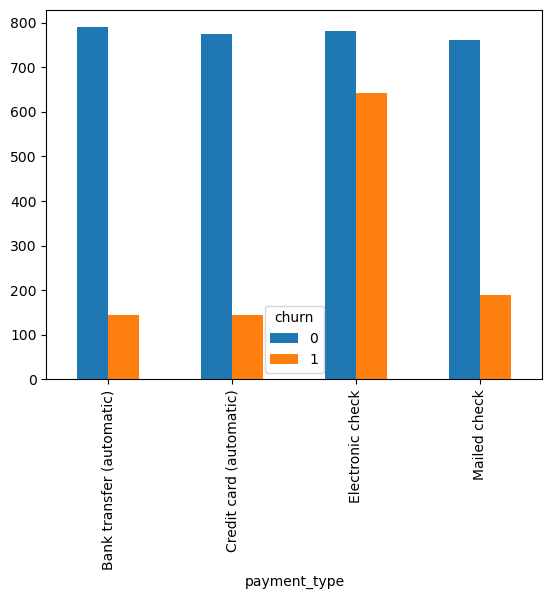

P-value is: 5.412195802407718e-84

Expected
             0           1
0   685.451361  247.548639
1   675.165917  243.834083
2  1045.441893  377.558107
3   697.940828  252.059172

Observed

churn                        0    1
payment_type                       
Bank transfer (automatic)  789  144
Credit card (automatic)    774  145
Electronic check           780  643
Mailed check               761  189




In [12]:
# Explore data

for col in train_telco.iloc[:,:-22]:
    if train_telco[col].dtype != 'float64':
        print(col.upper())
        print()
        pct = pd.crosstab(train_telco[col], train_telco.churn)
        pct.plot.bar()
        plt.show()
        res, p, dgf, exp = stats.chi2_contingency(pd.crosstab(train_telco[col], train_telco.churn))
        print(f'P-value is: {p}')
        print()
        print('Expected')
        print(pd.DataFrame(exp))
        print()
        print('Observed')
        print()
        print(pd.crosstab(train_telco[col], train_telco.churn))
        print()
        print()

In [ ]:
# senior_citizen (p = e-19)
# partner = e-25
# dependents = e-26
# online_security e-104
# online_backup e-79
# device_protection e-70
tech_support e-99
contract_type e-153
internet service type e-92
